In [14]:
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import MobileNet, decode_predictions
import matplotlib.pyplot as plt
import time
import cv2

In [15]:
print(tf.__version__)

2.3.1


In [16]:
mobilenet = tf.keras.applications.mobilenet
model = mobilenet.MobileNet(weights = "imagenet")
#model = tf.keras.models.load_model('./model.pb')

In [17]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [18]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model.pb/assets


In [36]:
#saved_model_path = "./saved_models/{}".format(int(time.time()))
saved_model_path = "./saved_models/1/"
tf.saved_model.save(model, saved_model_path)

INFO:tensorflow:Assets written to: ./saved_models/1/assets


In [25]:
!ls saved_models/


1


In [37]:
new_model = tf.saved_model.load('./saved_models/1')

In [41]:
new_model =  tf.keras.models.load_model('my_model.pb')

In [38]:
img = cv2.imread('../cat.jpg', -1) # -1은 왜 해주는거지?
img = cv2.resize(img, (224, 224)) # 리사이즈 까지는 알겠는데 

In [39]:
import time

In [31]:
infer = new_model.signatures["serving_default"]

테스트 시 소요 시간 : 0.5887069702148438
shower_curtain (72.27%)


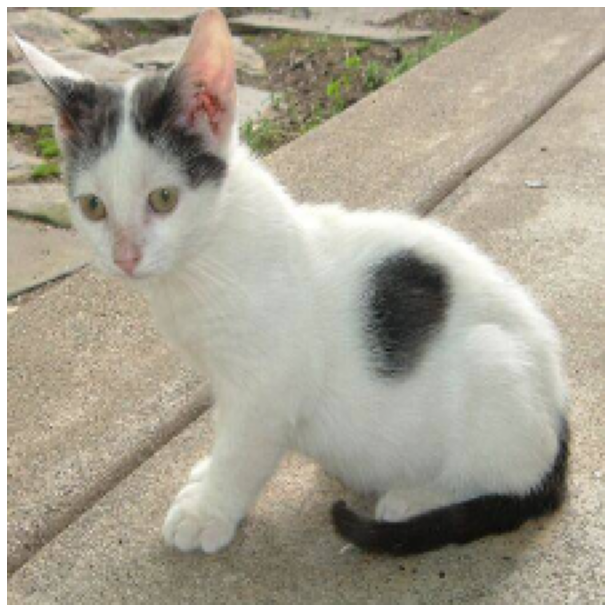

In [42]:
start = time.time() # 시간을 재기 위해 스타트
yhat = new_model.predict(img.reshape(-1, 224, 224, 3))
time = time.time() - start
# label_key = np.argmax(yhat)
label = decode_predictions(yhat) # decode prediction은 뭐하는 애냐 
label = label[0][0] # 아마 2중구조인가보지 원래는 어떻게 생겼지?

print("테스트 시 소요 시간 : {}".format(time))
print('%s (%.2f%%)' % (label[1], label[2]*100))
img = img[:,:,::-1]
plt.figure(figsize=(11,11))
plt.imshow(img)
plt.axis("off")
plt.show()